# Wine quality

Ce jeu de donnée permet de déterminer la qualité de 1599 vins, classée par une valeur entière entre 3 et 8 grâce à des mesures de différents paramètres. Les vin de meilleur qualité sont classés 8 et ceux de pire qualité sont classés 3.  On veut donc créer un modèle permet de prédire la qualité d'un vin à partir de ses paramètres mesurés.

## Chargement des données

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from outils.frontiere import *
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [111]:
# récupération de données discrètes
import pandas as pd
filename = "C:/Users/nonop/Downloads/TP_sk_learn_guigue_2023/TP_sklearn/winequality-red.csv"
data = pd.read_csv(filename)

X = data.values[:,:-1]
Y = data.values[:,-1] 

In [112]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [113]:
# remise en forme des Y entre 0 et nClasses
val = np.unique(Y)
transf = dict(zip(val,np.arange(len(val)))) # mapping [x,y,z] => [0,1,2]
y = np.vectorize(transf.get)(Y) 

In [114]:
# recherche à savoir si y a des données manquantes
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

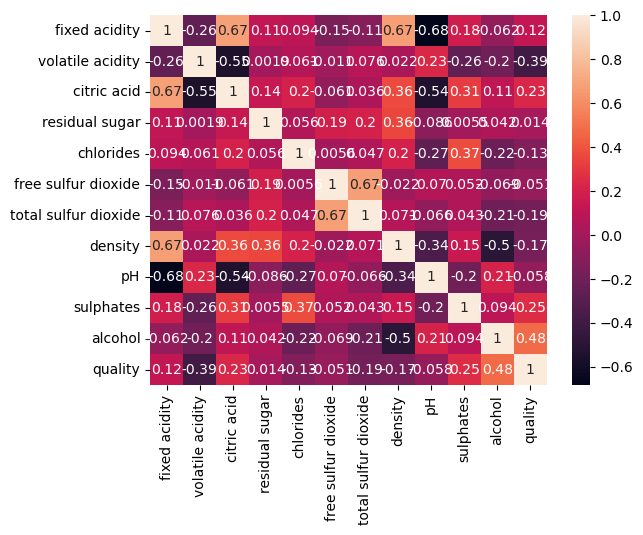

In [115]:
# on commence par regarder si il y a une dépendance entre les colones
import seaborn as sns
sns.heatmap(data=data.corr(),annot=True)

In [116]:
# on regarde la répattition des effectifs dans chaque classes
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# SANS BINARISATION DE LA QUALITE

## Comparaison des modèles
### Sans sélection des variables, sans normalisation, sans discretisation

In [9]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [63]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [10]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm,linear_model, naive_bayes
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict


In [65]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_train,y_train)
    yhat = cross_val_predict(mod, X_train, y_train)
    acc_cv = cross_val_score(mod, X_train, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RegLog 0.5555661812649424
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.63      0.74      0.68       452
           3       0.48      0.60      0.53       413
           4       0.45      0.07      0.12       151
           5       0.00      0.00      0.00        13

    accuracy                           0.56      1071
   macro avg       0.26      0.24      0.22      1071
weighted avg       0.52      0.56      0.51      1071

SVM 0.4920625950880243
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.64      0.44      0.52       452
           3       0.43      0.80      0.56       413
           4       0.00      0.00      0.00       151
           5       0.00      0.00      0.00        13

    accuracy                

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 0.6601999565311889
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.71      0.76      0.74       452
           3       0.60      0.67      0.63       413
           4       0.64      0.48      0.55       151
           5       0.67      0.15      0.25        13

    accuracy                           0.65      1071
   macro avg       0.44      0.35      0.36      1071
weighted avg       0.63      0.65      0.64      1071

XGboost 0.6489502282112584
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.20      0.06      0.09        36
           2       0.71      0.77      0.74       452
           3       0.61      0.64      0.63       413
           4       0.61      0.52      0.56       151
           5       0.33      0.15      0.21        13

    accuracy      

### Discrétiser les variables avec bcp de valeurs uniques

In [66]:
# recherche si les variables sont dicretes ou non
print(Y.shape)
print(X[:,0].shape)
n = data.nunique(axis=0)
  
print("number of unique values in each column :\n", n)

(1599,)
(1599,)
number of unique values in each column :
 fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


On discrétse seulement la colomne 7

In [67]:
# discrétisation de la colonne 7
from sklearn.preprocessing import KBinsDiscretizer
dis = KBinsDiscretizer(encode='ordinal', strategy='uniform')
dis.fit(X_train[:,7:8])
X_train_dis = dis.transform(X_train[:,7:8])

In [68]:
# on refait la matrice de design
X_new = np.hstack((X_train[:,(0,1,2,3,4,5,6,8,9,10)], X_train_dis))

In [70]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_new,y_train)
    yhat = cross_val_predict(mod, X_new, y_train)
    acc_cv = cross_val_score(mod, X_new, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RegLog 0.5480982395131493
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.63      0.71      0.67       452
           3       0.48      0.57      0.52       413
           4       0.46      0.21      0.28       151
           5       0.00      0.00      0.00        13

    accuracy                           0.55      1071
   macro avg       0.26      0.25      0.24      1071
weighted avg       0.51      0.55      0.52      1071

SVM 0.491128015648772
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.64      0.44      0.52       452
           3       0.43      0.79      0.56       413
           4       0.00      0.00      0.00       151
           5       0.00      0.00      0.00        13

    accuracy                 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 0.6555227124538143
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.71      0.78      0.74       452
           3       0.60      0.67      0.63       413
           4       0.68      0.50      0.58       151
           5       0.67      0.15      0.25        13

    accuracy                           0.66      1071
   macro avg       0.44      0.35      0.37      1071
weighted avg       0.64      0.66      0.64      1071

XGboost 0.648958921973484
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.18      0.06      0.09        36
           2       0.71      0.77      0.74       452
           3       0.60      0.63      0.62       413
           4       0.63      0.56      0.59       151
           5       0.29      0.15      0.20        13

    accuracy       

Pas d'amélioration des performances en validation croisée

### Normalisation des variables car échelles de mesures très différentes

In [72]:
# normalisation
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_new = scal.fit_transform(X_train)
print(X_new.shape)

(1071, 11)


In [73]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog','SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_new,y_train)
    yhat = cross_val_predict(mod, X_new, y_train)
    acc_cv = cross_val_score(mod, X_new, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RegLog 0.5770571614866332
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.65      0.73      0.69       452
           3       0.51      0.55      0.53       413
           4       0.53      0.41      0.46       151
           5       0.00      0.00      0.00        13

    accuracy                           0.58      1071
   macro avg       0.28      0.28      0.28      1071
weighted avg       0.55      0.58      0.56      1071

SVM 0.5985394479460987
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.67      0.75      0.71       452
           3       0.53      0.61      0.57       413
           4       0.55      0.34      0.42       151
           5       0.00      0.00      0.00        13

    accuracy                

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest 0.6648293849163225
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        36
           2       0.71      0.78      0.74       452
           3       0.61      0.67      0.63       413
           4       0.64      0.48      0.55       151
           5       0.50      0.15      0.24        13

    accuracy                           0.65      1071
   macro avg       0.41      0.35      0.36      1071
weighted avg       0.63      0.65      0.64      1071

XGboost 0.6508193870897632
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.20      0.06      0.09        36
           2       0.71      0.77      0.74       452
           3       0.61      0.65      0.63       413
           4       0.61      0.52      0.56       151
           5       0.33      0.15      0.21        13

    accuracy      

Meilleur performances que sans normalisation

## Avec sélection des variables

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

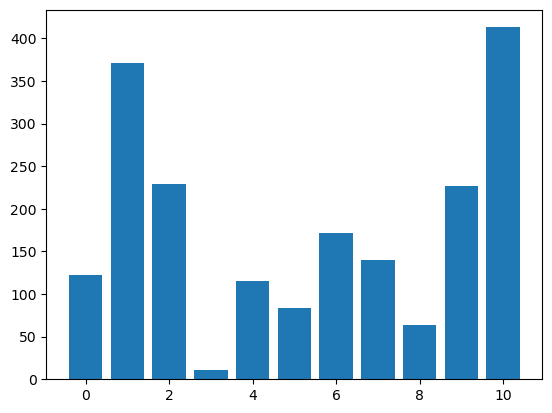

In [74]:
# Corrélation des variables par rapport à y
corr = np.abs(X_new.T @ y_train)
plt.figure()
plt.bar(np.arange(len(corr)), corr)

data.corr()["quality"].sort_values()

### Sélection itérative avec sklearn
faire varier n_feature_to_select

In [74]:
# Avec sklearn
from sklearn.feature_selection import SequentialFeatureSelector
n = [4,6,8,10]
X_feat = []
mod = RandomForestClassifier()
for i in range(len(n)):
    selector = SequentialFeatureSelector(mod, n_features_to_select=n[i])
    selector = selector.fit(X_new, y_train)
    X_feat.append(selector.transform(X_new))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

In [77]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']
lr = []
ls = []
lrf = []
lxb = []
list = [lr, ls, lrf, lxb]

for i in range(len(liste_mod)):
    for j in range(len(n)):
        mod = liste_mod[i]
        mod.fit(X_feat[j],y_train)
        acc_cv = cross_val_score(mod, X_feat[j], y_train, scoring='accuracy')
        list[i].append(acc_cv.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


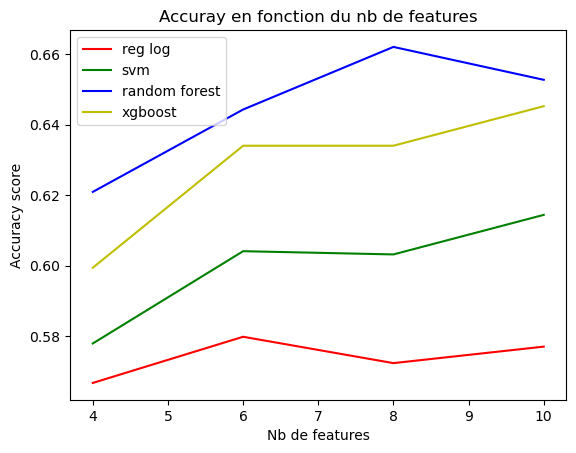

In [78]:
# on regarde les performances en fonction du nombre de variables
import matplotlib.pyplot as plt
import numpy as np
import math
  
plt.plot(n, lr, color='r', label='reg log')
plt.plot(n, ls, color='g', label='svm')
plt.plot(n, lrf, color='b', label='random forest')
plt.plot(n, lxb, color='y', label='xgboost')

plt.xlabel("Nb de features")
plt.ylabel("Accuracy score")
plt.title("Accuray en fonction du nb de features")
  
plt.legend()
  
plt.show()

Les performances ne sont pas meilleur avec cette sélection de variables sauf pour le Reglog par rapport à sans sélection 
de variables. Cette méthodes prends du temps comparée aux méthodes suivantes.

### Sélection avec ACP 
faire varier n_components

In [79]:
# Avec ACP
from sklearn.decomposition import PCA
n = [4,6,8,10]
X_feat = []

for i in range(len(n)):
    # application de la PCA
    pca = PCA(n_components=n[i])
    pca.fit(X_new)
    # projection
    X_feat.append(pca.transform(X_new))

In [80]:
# cv train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']
mr = []
ms = []
mrf = []
mxb = []
list2 = [mr, ms, mrf, mxb]

for i in range(len(liste_mod)):
    for j in range(len(n)):
        mod = liste_mod[i]
        mod.fit(X_feat[j],y_train)
        acc_cv = cross_val_score(mod, X_feat[j], y_train, scoring='accuracy')
        list2[i].append(acc_cv.mean())
        print(n[j], liste_mod_str[i], acc_cv.mean())
        print(list2[i])

4 RegLog 0.5611736579004564
[0.5611736579004564]
6 RegLog 0.557435340143447
[0.5611736579004564, 0.557435340143447]
8 RegLog 0.5798522060421647
[0.5611736579004564, 0.557435340143447, 0.5798522060421647]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 RegLog 0.5733058030862855
[0.5611736579004564, 0.557435340143447, 0.5798522060421647, 0.5733058030862855]
4 SVM 0.566768093892632
[0.566768093892632]
6 SVM 0.5835905237991741
[0.566768093892632, 0.5835905237991741]
8 SVM 0.5891893066724625
[0.566768093892632, 0.5835905237991741, 0.5891893066724625]
10 SVM 0.5985351010649859
[0.566768093892632, 0.5835905237991741, 0.5891893066724625, 0.5985351010649859]
4 RandomForest 0.6088545968267768
[0.6088545968267768]
6 RandomForest 0.6452249510975875
[0.6088545968267768, 0.6452249510975875]
8 RandomForest 0.6377700499891328
[0.6088545968267768, 0.6452249510975875, 0.6377700499891328]
10 RandomForest 0.6508237339708759
[0.6088545968267768, 0.6452249510975875, 0.6377700499891328, 0.6508237339708759]
4 XGboost 0.5985264073027603
[0.5985264073027603]
6 XGboost 0.6134709845685721
[0.5985264073027603, 0.6134709845685721]
8 XGboost 0.623747011519235
[0.5985264073027603, 0.6134709845685721, 0.623747011519235]
10 XGboost 0.640547707020213
[0.5985264073

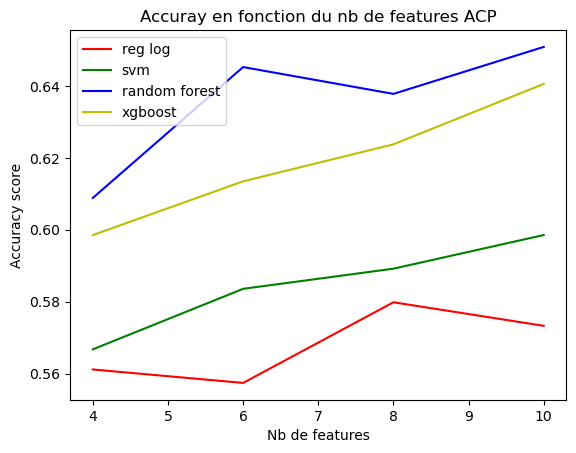

In [81]:
plt.plot(n, mr, color='r', label='reg log')
plt.plot(n, ms, color='g', label='svm')
plt.plot(n, mrf, color='b', label='random forest')
plt.plot(n, mxb, color='y', label='xgboost')

plt.xlabel("Nb de features")
plt.ylabel("Accuracy score")
plt.title("Accuray en fonction du nb de features ACP")
  
plt.legend()
  
plt.show()

De même que pour la sélection itérative, les performances ne sont pas meilleur avec ACP sauf pour le Reglog par rapport à sans sélection de variables.

Face à ces faibles résultats on décide de opter pour stratégie différence qui consister à faire en sorte que le modèle
prédise des classes binaires au lieu de 5 classes différentes. Soit 1 = bonne qualité et 0 = mauvaise qualité

# BINARISATION DE LA QUALITE

In [117]:
# on regarde la médiane des données qualités
import statistics

print(data["quality"].value_counts())
print("median =", statistics.median(data["quality"]))

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
median = 6


In [118]:
# on sépare la qualité en 2: les valeurs au dessus de 6 sont affectées à 1, les autres à 0
ab=[]
for x in data['quality']:
    if x>=6:
        ab.append(1)
    else:
        ab.append(0) 

In [119]:
# on définis les variables à expliquer et les variables explicatives
X = data.values[:,:-1]
y = pd.DataFrame(ab).values

In [120]:
# on regarde si on a bien fait des classes équilibrées
effectifs = [np.count_nonzero(y == classe) for classe in np.unique(y)]

dic = dict(zip(np.unique(y), effectifs))

print(dic) # pas trop grand déséquilibre donc pas besoin de reéquilibré

{0: 744, 1: 855}


In [121]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Comparaison des modèles
### Sans sélection des variables, sans normalisation, sans discretisation

In [16]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_train,y_train)
    yhat = cross_val_predict(mod, X_train, y_train)
    acc_cv = cross_val_score(mod, X_train, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RegLog 0.7423255813953489
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       494
           1       0.76      0.77      0.76       577

    accuracy                           0.74      1071
   macro avg       0.74      0.74      0.74      1071
weighted avg       0.74      0.74      0.74      1071



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

SVM 0.6330406433384047
              precision    recall  f1-score   support

           0       0.70      0.36      0.47       494
           1       0.61      0.87      0.72       577

    accuracy                           0.63      1071
   macro avg       0.66      0.61      0.60      1071
weighted avg       0.65      0.63      0.61      1071



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector 

RandomForest 0.7964964138230819
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       494
           1       0.82      0.80      0.81       577

    accuracy                           0.80      1071
   macro avg       0.80      0.80      0.80      1071
weighted avg       0.80      0.80      0.80      1071

XGboost 0.7955574875027168
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       494
           1       0.81      0.82      0.81       577

    accuracy                           0.80      1071
   macro avg       0.79      0.79      0.79      1071
weighted avg       0.80      0.80      0.80      1071



Bien meilleurs perf avec binarisation de sans. On passe de 0.64-0.66 de accuracy pour random forest et xgboost à 0.79.
Pour SVM et RegLog on passe de 0.50 et 0.55 respectivement à 0.63 et 0.74 respectivement

### Discrétiser les variables avec bcp de valeurs uniques

In [17]:
# recherche si les variables sont dicretes ou non
print(y.shape)
print(X[:,0].shape)
n = data.nunique(axis=0)
  
print("number of unique values in each column :\n", n)

(1599, 1)
(1599,)
number of unique values in each column :
 fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


On discrétse seulement la colomne 7

In [18]:
# discrétisation de la colonne 7
from sklearn.preprocessing import KBinsDiscretizer
dis = KBinsDiscretizer(encode='ordinal', strategy='uniform')
dis.fit(X_train[:,7:8])
X_train_dis = dis.transform(X_train[:,7:8])

In [19]:
# on refait la matrice de design
X_new = np.hstack((X_train[:,(0,1,2,3,4,5,6,8,9,10)], X_train_dis))

In [20]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_new,y_train)
    yhat = cross_val_predict(mod, X_new, y_train)
    acc_cv = cross_val_score(mod, X_new, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RegLog 0.7423255813953489
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       494
           1       0.76      0.77      0.76       577

    accuracy                           0.74      1071
   macro avg       0.74      0.74      0.74      1071
weighted avg       0.74      0.74      0.74      1071



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

SVM 0.6330406433384047
              precision    recall  f1-score   support

           0       0.70      0.36      0.47       494
           1       0.61      0.87      0.72       577

    accuracy                           0.63      1071
   macro avg       0.66      0.61      0.60      1071
weighted avg       0.65      0.63      0.61      1071



C:\Users\nonop\AppData\Local\Temp\ipykernel_2096\3742479894.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod.fit(X_new,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

RandomForest 0.7918409041512715
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       494
           1       0.81      0.83      0.82       577

    accuracy                           0.80      1071
   macro avg       0.80      0.80      0.80      1071
weighted avg       0.80      0.80      0.80      1071

XGboost 0.7918452510323843
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       494
           1       0.80      0.81      0.81       577

    accuracy                           0.79      1071
   macro avg       0.79      0.79      0.79      1071
weighted avg       0.79      0.79      0.79      1071



La discrétisation de permet pas une amélioration des performances

### Normalisation des variables car échelles de mesures très différentes

In [21]:
# normalisation des données
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_new = scal.fit_transform(X_train)
print(X_new.shape)

(1071, 11)


In [22]:
# cv sur train
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog','SVM','RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i]
    mod.fit(X_new,y_train)
    yhat = cross_val_predict(mod, X_new, y_train)
    acc_cv = cross_val_score(mod, X_new, y_train, scoring='accuracy')
    print(liste_mod_str[i], acc_cv.mean())
    print(classification_report(y_train, yhat))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RegLog 0.7395088024342534
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       494
           1       0.76      0.76      0.76       577

    accuracy                           0.74      1071
   macro avg       0.74      0.74      0.74      1071
weighted avg       0.74      0.74      0.74      1071



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

SVM 0.7581960443381874
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       494
           1       0.78      0.77      0.77       577

    accuracy                           0.76      1071
   macro avg       0.76      0.76      0.76      1071
weighted avg       0.76      0.76      0.76      1071



C:\Users\nonop\AppData\Local\Temp\ipykernel_2096\1307731847.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod.fit(X_new,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1044: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

RandomForest 0.803964355574875
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       494
           1       0.82      0.82      0.82       577

    accuracy                           0.81      1071
   macro avg       0.81      0.81      0.81      1071
weighted avg       0.81      0.81      0.81      1071

XGboost 0.7955574875027168
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       494
           1       0.81      0.82      0.81       577

    accuracy                           0.80      1071
   macro avg       0.79      0.79      0.79      1071
weighted avg       0.80      0.80      0.80      1071



Comme pour sans binarisation la normalisation permet une amélioration des performances.

## Avec sélection des variables

### Sélection avec ACP 
faire varier n_components

In [46]:
# Avec ACP
from sklearn.decomposition import PCA
n = [4,6,8,10]
X_feat = []

for i in range(len(n)):
    # application de la PCA
    pca = PCA(n_components=n[i])
    pca.fit(X_new)
    # projection
    X_feat.append(pca.transform(X_new))

In [47]:
# cv
liste_mod = [LogisticRegression(), svm.SVC(), RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RegLog', 'SVM','RandomForest','XGboost']
mr = []
ms = []
mrf = []
mxb = []
list2 = [mr, ms, mrf, mxb]

for i in range(len(liste_mod)):
    for j in range(len(n)):
        mod = liste_mod[i]
        mod.fit(X_feat[j],y_train)
        acc_cv = cross_val_score(mod, X_feat[j], y_train, scoring='accuracy')
        list2[i].append(acc_cv.mean())
        print(n[j], liste_mod_str[i], acc_cv.mean())
        print(list2[i])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

4 RegLog 0.7012127798304716
[0.7012127798304716]
6 RegLog 0.7199217561399697
[0.7012127798304716, 0.7199217561399697]
8 RegLog 0.7264420778091719
[0.7012127798304716, 0.7199217561399697, 0.7264420778091719]
10 RegLog 0.7376396435557487
[0.7012127798304716, 0.7199217561399697, 0.7264420778091719, 0.7376396435557487]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

4 SVM 0.7189524016518148
[0.7189524016518148]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

6 SVM 0.7507107150619431
[0.7189524016518148, 0.7507107150619431]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

8 SVM 0.7516626820256466
[0.7189524016518148, 0.7507107150619431, 0.7516626820256466]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

10 SVM 0.7581916974570746
[0.7189524016518148, 0.7507107150619431, 0.7516626820256466, 0.7581916974570746]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

4 RandomForest 0.7554096935448815
[0.7554096935448815]


C:\Users\nonop\AppData\Local\Temp\ipykernel_2096\2011525728.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod.fit(X_feat[j],y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

6 RandomForest 0.7834079547924364
[0.7554096935448815, 0.7834079547924364]


C:\Users\nonop\AppData\Local\Temp\ipykernel_2096\2011525728.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod.fit(X_feat[j],y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

8 RandomForest 0.7862029993479679
[0.7554096935448815, 0.7834079547924364, 0.7862029993479679]


C:\Users\nonop\AppData\Local\Temp\ipykernel_2096\2011525728.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod.fit(X_feat[j],y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

10 RandomForest 0.7880678113453596
[0.7554096935448815, 0.7834079547924364, 0.7862029993479679, 0.7880678113453596]
4 XGboost 0.7348532927624429
[0.7348532927624429]
6 XGboost 0.762868941534449
[0.7348532927624429, 0.762868941534449]
8 XGboost 0.769393610084764
[0.7348532927624429, 0.762868941534449, 0.769393610084764]
10 XGboost 0.7815518365572702
[0.7348532927624429, 0.762868941534449, 0.769393610084764, 0.7815518365572702]


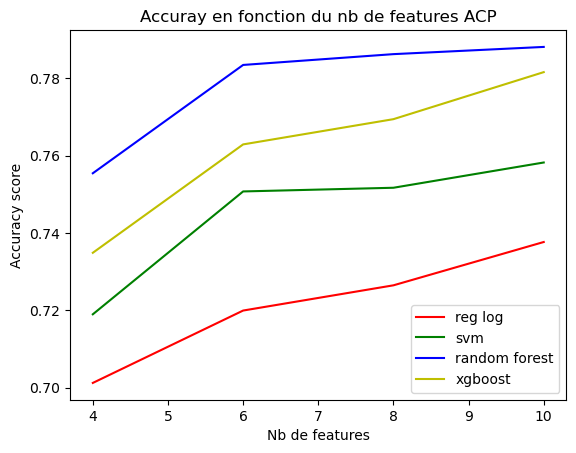

In [48]:
plt.plot(n, mr, color='r', label='reg log')
plt.plot(n, ms, color='g', label='svm')
plt.plot(n, mrf, color='b', label='random forest')
plt.plot(n, mxb, color='y', label='xgboost')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Nb de features")
plt.ylabel("Accuracy score")
plt.title("Accuray en fonction du nb de features ACP")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

Les résulats sont meilleurs sans sélection de variables. Commen on s'y attandait c'est pour les modèles XGboost et Random Forest qu'on a les meilleurs résulats.

On retient donc 1 traitements: la normalisation

## Optimisation des paramètres de chaque modèles

In [55]:
# grid search pour Random forest et XGboost
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
}

liste_mod = [RandomForestClassifier(), xgb.XGBClassifier()]
liste_mod_str = ['RandomForest','XGboost']

for i in range(len(liste_mod)):
    mod = liste_mod[i] 
    meta_mod = GridSearchCV(estimator=mod, param_grid=param_grid)
    mmapta_mod.fit(X_new,y_train) 
    print(liste_mod_str[i], "Best parameter (CV score=%0.3f):" % meta_mod.best_score_)
    print(meta_mod.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

RandomForest Best parameter (CV score=0.788):
{'max_depth': 8, 'n_estimators': 200}


# Conclusion

Les meilleurs modèles sont donc:

XGboost et Randomforest avec comme paramètres: 'max_depth': 8, 'n_estimators': 200. Avec X normalisée et y binarisé
On s'intérresse donc à la classification faite pas ces 2 modèles sur les données test.

### Résultats des 2 modèles retenus
courbes ROC et matrices de confusion

In [134]:
# on normalise toutes les données
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()
X_norm = scal.fit_transform(X)
print(X_norm.shape)

(1599, 11)


In [136]:
# split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=0)

C:\Users\nonop\AppData\Local\Temp\ipykernel_2096\450928804.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod1.fit(X_train,y_train)


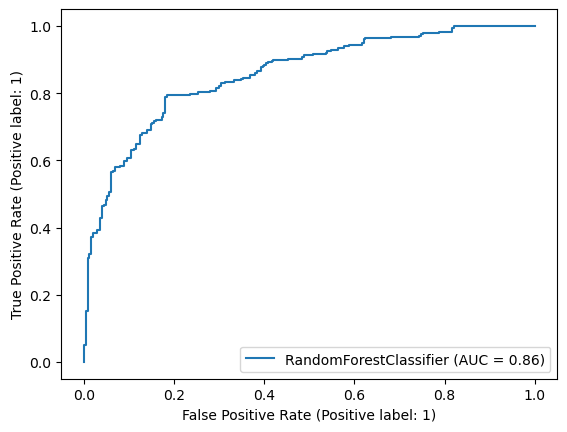

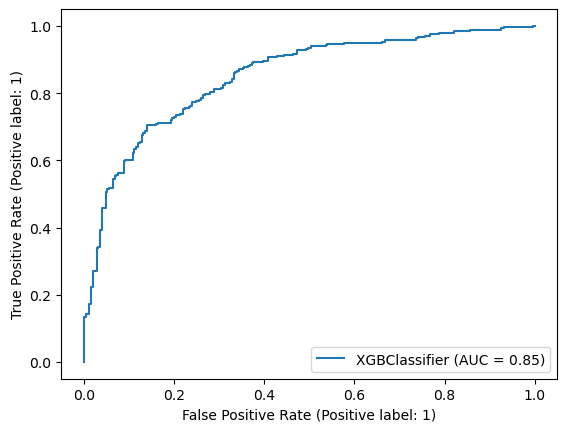

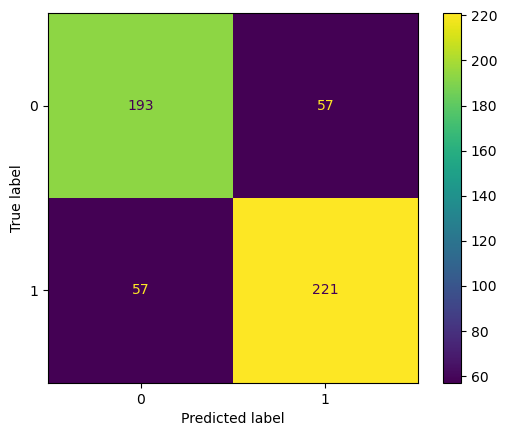

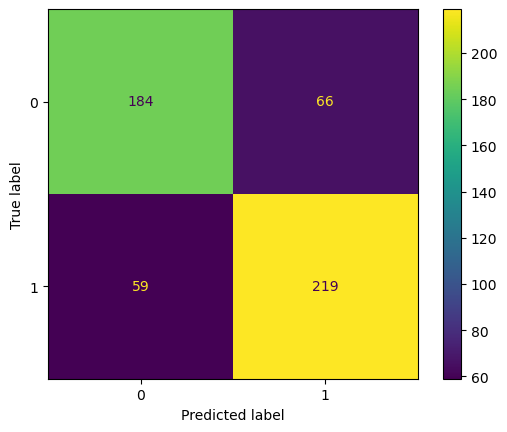

In [143]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

mod1 = RandomForestClassifier(max_depth= 8, n_estimators= 200)
mod1.fit(X_train,y_train)
mod2 = xgb.XGBClassifier(max_depth= 8, n_estimators= 200)
mod2.fit(X_train,y_train) 

# on trace les courbes ROC
r1 = RocCurveDisplay.from_estimator(mod1, X_test, y_test)
r2 = RocCurveDisplay.from_estimator(mod2, X_test, y_test)

# on trace les matrices de confusion
cm1 = ConfusionMatrixDisplay.from_estimator(mod1, X_test, y_test)
cm2 = ConfusionMatrixDisplay.from_estimator(mod2, X_test, y_test)


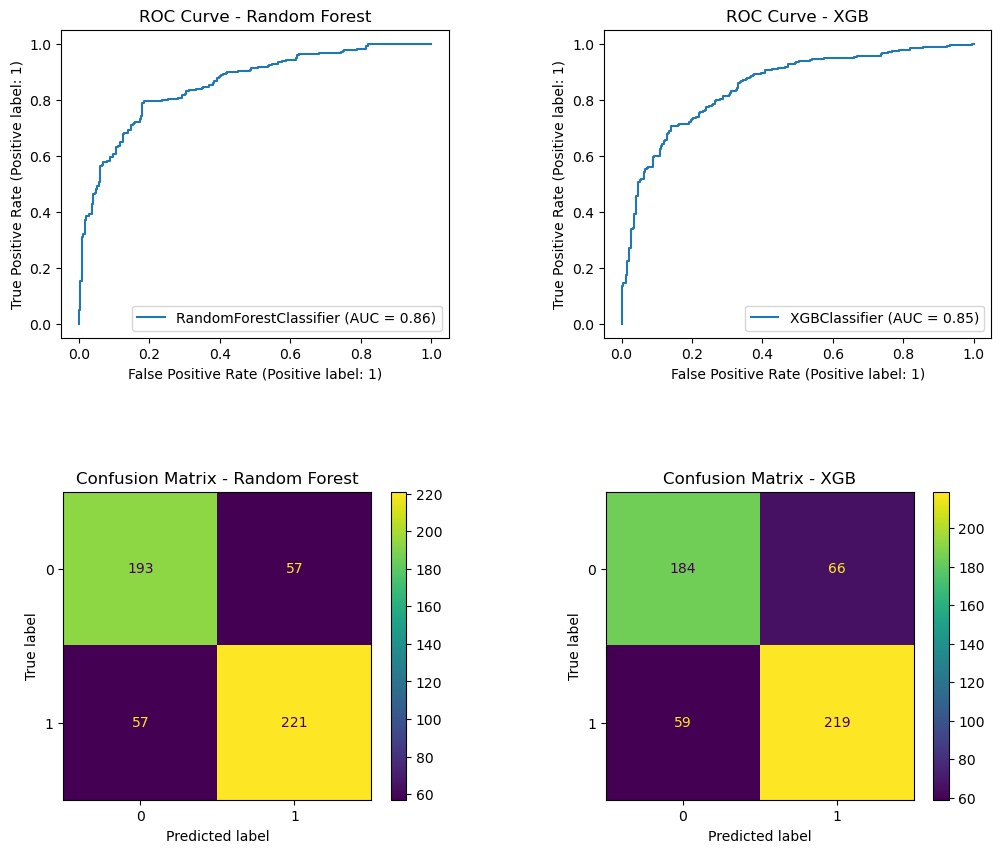

In [149]:
### Affichage ###
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot the first ROC curve in the top-left subplot
r1.plot(ax=axs[0, 0])
axs[0, 0].set_title('ROC Curve - Random Forest')

# Plot the second ROC curve in the top-right subplot
r2.plot(ax=axs[0, 1])
axs[0, 1].set_title('ROC Curve - XGB')

# Plot the first confusion matrix in the bottom-left subplot
cm1.plot(ax=axs[1, 0])
axs[1, 0].set_title('Confusion Matrix - Random Forest')

# Plot the second confusion matrix in the bottom-right subplot
cm2.plot(ax=axs[1, 1])
axs[1, 1].set_title('Confusion Matrix - XGB')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Show the plot
plt.show()

Ces résultats sont satisfaisants pour les deux modèles: XGboost et RandomForest. On voit qu'on a peu de fausses prédictions. Toutefois on perd en information car on normalise et on ne classe la qualité des vins que en 2 catégories: bon et mauvais, au lieu de 5 catégories.